# Fast Flow

## Loading Dataset

In [1]:
import pandas as pd
#trial,payload,size,task_size,workers,time

#load sequential times
seq_times = pd.read_csv('results/sequential.csv')
seq_times = seq_times.drop(columns=['trial'])

#load parallel base times
par_times = pd.read_csv('results/naive_ff.csv')
par_times = par_times[par_times['time'] > 0]
par_times = par_times.drop(columns=['trial'])

#load parallel working emitter times (queue size 1)
we_times = pd.read_csv('results/working_emitter_ff.csv')
we_times = we_times[we_times['time'] > 0]
we_times = we_times.drop(columns=['trial'])

#load parallel working emitter times (queue size 2)
we2_times = pd.read_csv('results/working_emitter_ff2.csv')
we2_times = we2_times[we2_times['time'] > 0]
we2_times = we2_times.drop(columns=['trial'])

In [2]:
par_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.001171
1,1,10000,-1,3,0.001497
2,1,10000,-1,7,0.001608
3,1,10000,-1,15,0.002245
4,1,10000,-1,31,0.004342


In [3]:
we_times.head()

,payload,size,task_size,workers,time
0,1,10000,-1,1,0.000828
1,1,10000,-1,3,0.001467
2,1,10000,-1,7,0.001248
3,1,10000,-1,15,0.002543
4,1,10000,-1,31,0.004945


we first keep the best time for each size, and then we use this to compare based on the payload

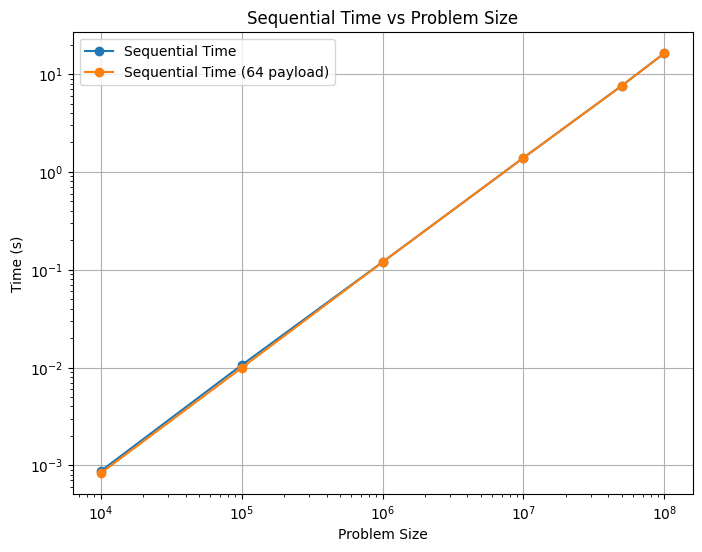

In [4]:
import matplotlib.pyplot as plt

small = seq_times[seq_times['payload'] == 1]
big = seq_times[seq_times['payload'] == 64]


# Plot sequential time vs problem size
plt.figure(figsize=(8, 6))
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time')
plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (64 payload)')
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential Time vs Problem Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Plots over different sizes

seem that the payload size does not impact much on a single machine, so from now on all test are done using a payload of 1 to speedup the process and consume less resources. Although the sotring time is not influenced the total time required to generate the array is significantly higher.

In [5]:
min_par_times = par_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#par_times = par_times.loc[par_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

min_we_times = we_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#we_times = we_times.loc[we_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

min_we2_times = we2_times.groupby(['size', 'workers']).agg({'time': 'min'}).reset_index()
#we2_times = we2_times.loc[we2_times.groupby('size')['time'].idxmin()].reset_index(drop=True)

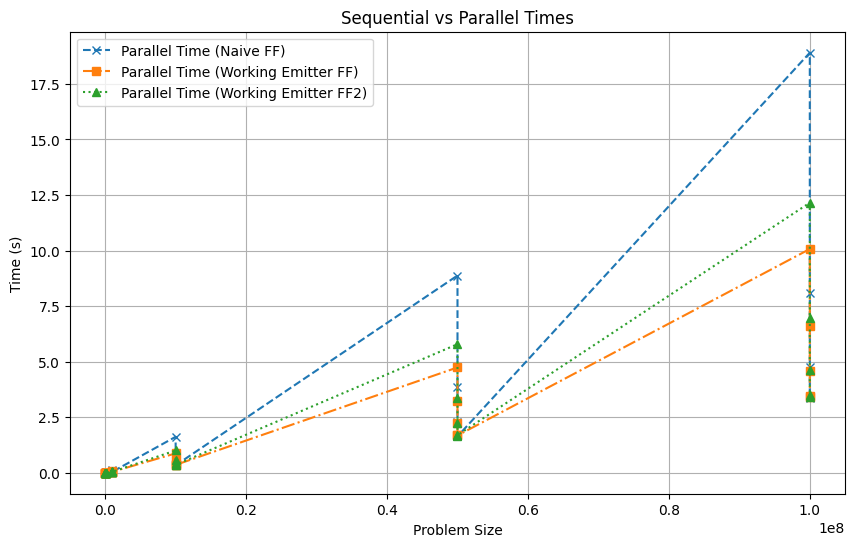

In [6]:
plt.figure(figsize=(10, 6))

# Plot sequential times
#plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')
#plt.plot(big['size'], big['time'], marker='o', label='Sequential Time (Payload 64)')

# Filter parallel times to show only the best time for each size
plt.plot(min_par_times['size'], min_par_times['time'], marker='x', label='Parallel Time (Naive FF)', linestyle='--')

# Filter working emitter times to show only the best time for each size
plt.plot(min_we_times['size'], min_we_times['time'], marker='s', label='Parallel Time (Working Emitter FF)', linestyle='-.')

plt.plot(min_we2_times['size'], min_we2_times['time'], marker='^', label='Parallel Time (Working Emitter FF2)', linestyle=':')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title('Sequential vs Parallel Times')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_3266/1054100429.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  par_x = min_par_times[par_times['workers'] == numThreads -1]
/tmp/ipykernel_3266/1054100429.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  we_x = min_we_times[we_times['workers'] == numThreads -1]
/tmp/ipykernel_3266/1054100429.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  we2_x = min_we2_times[we2_times['workers'] == numThreads -1]


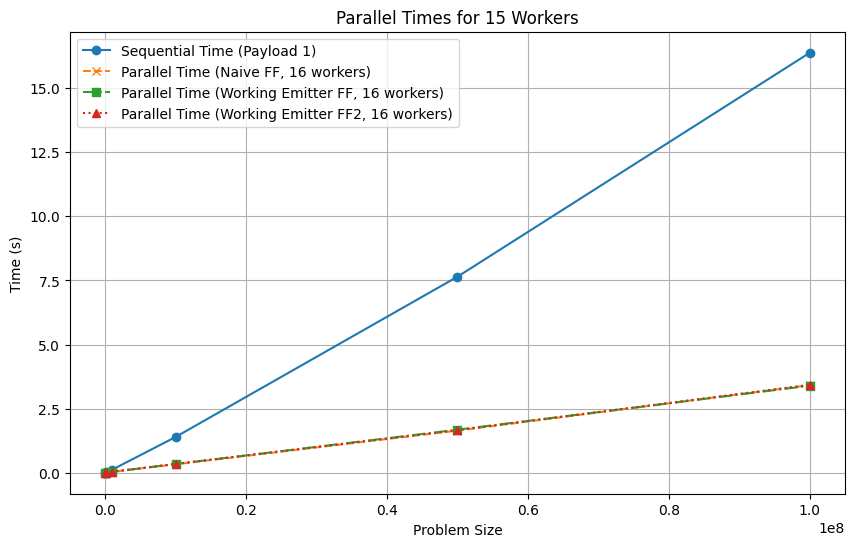

In [7]:
plt.figure(figsize=(10, 6))

numThreads =16

par_x = min_par_times[par_times['workers'] == numThreads -1]
par_x = par_x.reset_index(drop=True)
we_x = min_we_times[we_times['workers'] == numThreads -1]
we_x = we_x.reset_index(drop=True)
we2_x = min_we2_times[we2_times['workers'] == numThreads -1]
we2_x = we2_x.reset_index(drop=True)

# Plot sequential times
plt.plot(small['size'], small['time'], marker='o', label='Sequential Time (Payload 1)')

# Filter parallel times for workers = 16
plt.plot(par_x['size'], par_x['time'], marker='x', label='Parallel Time (Naive FF, 16 workers)', linestyle='--')

# Filter working emitter times for workers = 16
plt.plot(we_x['size'], we_x['time'], marker='s', label='Parallel Time (Working Emitter FF, 16 workers)', linestyle='-.')

plt.plot(we2_x['size'], we2_x['time'], marker='^', label='Parallel Time (Working Emitter FF2, 16 workers)', linestyle=':')
# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Time (s)')
plt.title(f'Parallel Times for {numThreads-1} Workers')
plt.legend()
plt.grid(True)
plt.show()


what about the speedup?

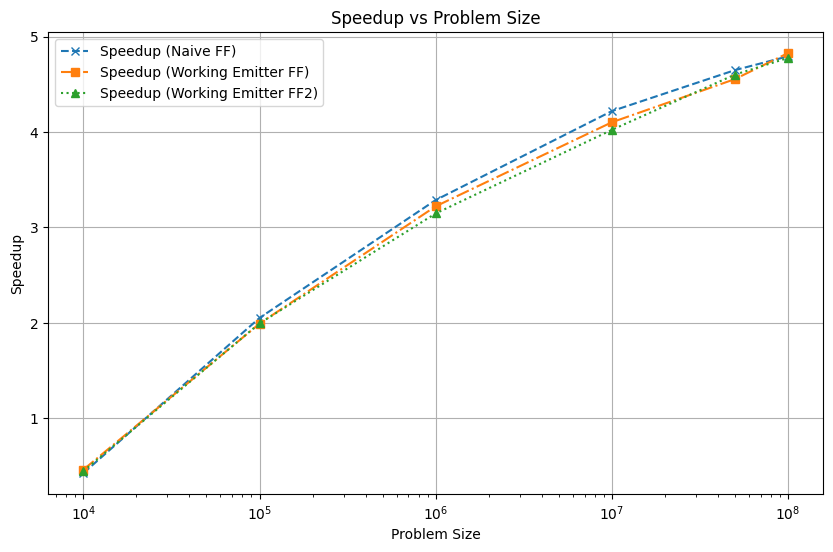

In [8]:
plt.figure(figsize=(10, 6))

# Calculate speedup for naive FF
speedup_naive = small['time'] / par_x['time']

# Calculate speedup for working emitter FF
speedup_emitter = small['time'] / we_x['time']

speedup_emitter_2 = small['time'] / we2_x['time']

# Plot speedup
plt.plot(par_x['size'], speedup_naive, marker='x', label='Speedup (Naive FF)', linestyle='--')
plt.plot(we_x['size'], speedup_emitter, marker='s', label='Speedup (Working Emitter FF)', linestyle='-.')
plt.plot(we2_x['size'], speedup_emitter_2, marker='^', label='Speedup (Working Emitter FF2)', linestyle=':')

plt.xscale('log')
#plt.yscale('log')

# Configure plot
plt.xlabel('Problem Size')
plt.ylabel('Speedup')
plt.title('Speedup vs Problem Size')
plt.legend()
plt.grid(True)
plt.show()

## Plots over problems Strong scaling (Time, Speedup, Efficiency)

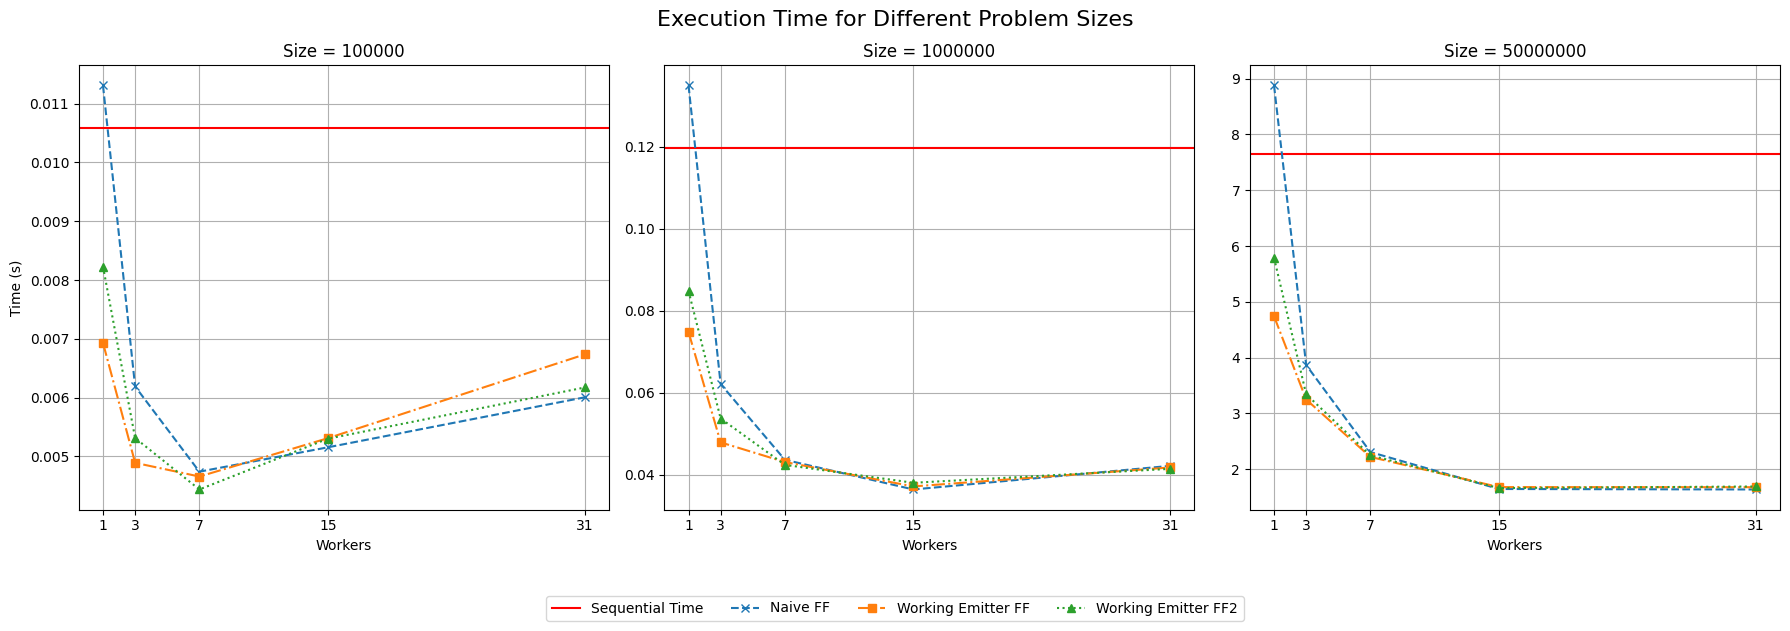

In [9]:
import matplotlib.pyplot as plt

SIZES = [10000, 100000, 1000000, 10000000, 50000000, 100000000]
selected_sizes = [SIZES[1], SIZES[2], SIZES[4]]  # [100000, 1000000, 50000000]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, size in enumerate(selected_sizes):
    # Filter data
    par = par_times[(par_times['size'] == size) & (par_times['payload'] == 1)].copy()
    we = we_times[(we_times['size'] == size) & (we_times['payload'] == 1)].copy()
    we2 = we2_times[(we2_times['size'] == size) & (we2_times['payload'] == 1)].copy()
    seq = seq_times[(seq_times['size'] == size) & (seq_times['payload'] == 1)].copy()

    # Reset indices
    par = par.reset_index(drop=True)
    we = we.reset_index(drop=True)
    we2 = we2.reset_index(drop=True)
    seq = seq.reset_index(drop=True)

    # Keep only the best time for each number of workers
    par = par.loc[par.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we = we.loc[we.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we2 = we2.loc[we2.groupby('workers')['time'].idxmin()].reset_index(drop=True)

    ax = axs[i]
    ax.axhline(y=seq['time'].iloc[0], color='r', linestyle='-', label='Sequential Time')
    ax.plot(par['workers'], par['time'], marker='x', label='Naive FF', linestyle='--')
    ax.plot(we['workers'], we['time'], marker='s', label='Working Emitter FF', linestyle='-.')
    ax.plot(we2['workers'], we2['time'], marker='^', label='Working Emitter FF2', linestyle=':')

    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_title(f'Size = {size}')
    ax.set_xlabel('Workers')
    ax.set_xticks(par['workers'])
    ax.grid(True)

axs[0].set_ylabel('Time (s)')

# Create a single legend below all plots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Execution Time for Different Problem Sizes', fontsize=16)
plt.savefig('figures/execution_time_subplots_refined.png', dpi=500, bbox_inches='tight')
plt.show()


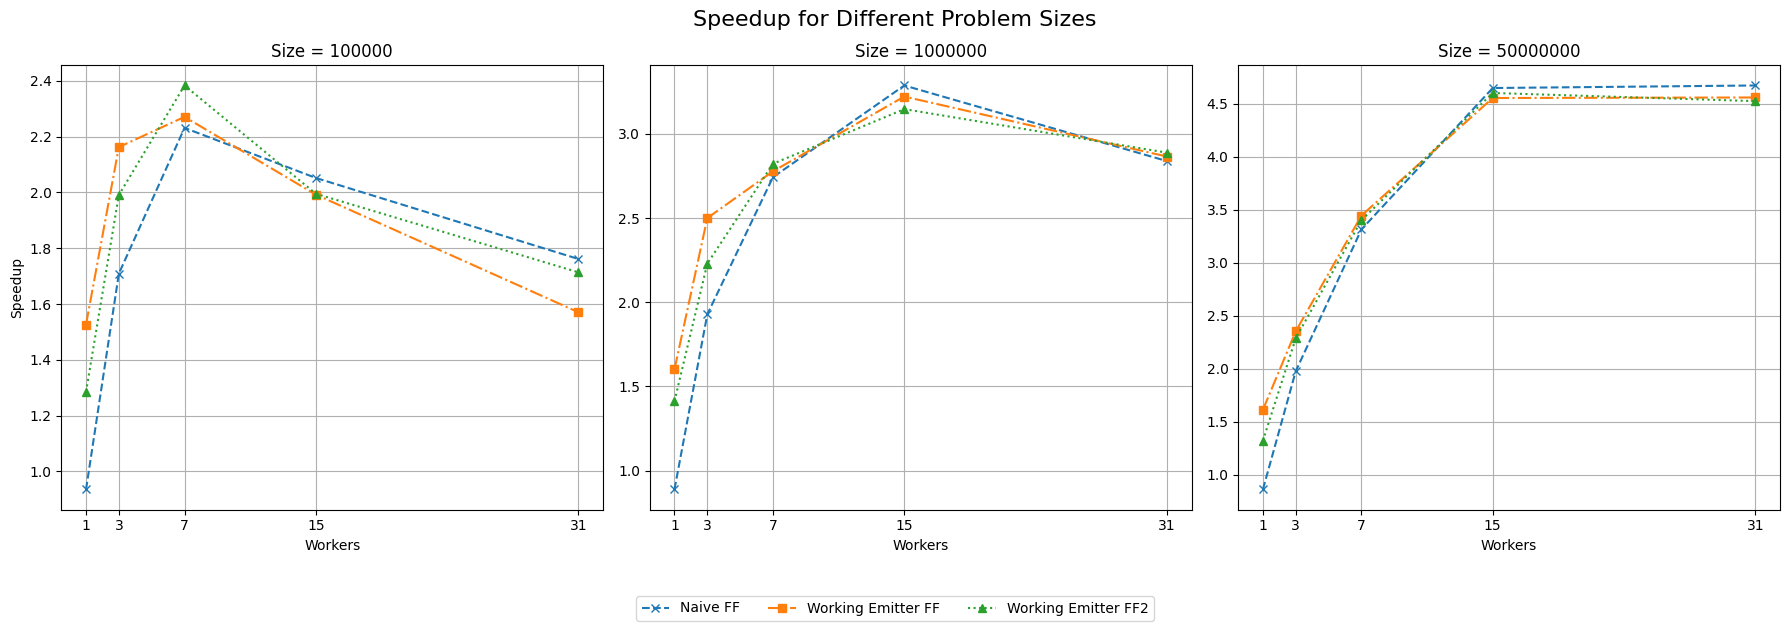

In [10]:
import matplotlib.pyplot as plt

SIZES = [10000, 100000, 1000000, 10000000, 50000000, 100000000]
selected_sizes = [SIZES[1], SIZES[2], SIZES[4]]  # [100000, 1000000, 50000000]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, size in enumerate(selected_sizes):
    # Filter data
    par = par_times[(par_times['size'] == size) & (par_times['payload'] == 1)].copy()
    we = we_times[(we_times['size'] == size) & (we_times['payload'] == 1)].copy()
    we2 = we2_times[(we2_times['size'] == size) & (we2_times['payload'] == 1)].copy()
    seq = seq_times[(seq_times['size'] == size) & (seq_times['payload'] == 1)].copy()

    # Reset indices
    par = par.reset_index(drop=True)
    we = we.reset_index(drop=True)
    we2 = we2.reset_index(drop=True)
    seq = seq.reset_index(drop=True)

    # Keep only the best time per number of workers
    par = par.loc[par.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we = we.loc[we.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we2 = we2.loc[we2.groupby('workers')['time'].idxmin()].reset_index(drop=True)

    seq_time = seq['time'].iloc[0]

    # Compute speedup
    par['speedup'] = seq_time / par['time']
    we['speedup'] = seq_time / we['time']
    we2['speedup'] = seq_time / we2['time']

    ax = axs[i]
    ax.plot(par['workers'], par['speedup'], marker='x', label='Naive FF', linestyle='--')
    ax.plot(we['workers'], we['speedup'], marker='s', label='Working Emitter FF', linestyle='-.')
    ax.plot(we2['workers'], we2['speedup'], marker='^', label='Working Emitter FF2', linestyle=':')

    ax.set_title(f'Size = {size}')
    ax.set_xlabel('Workers')
    ax.set_xticks(par['workers'])
    ax.grid(True)

axs[0].set_ylabel('Speedup')

# Create a single legend below all plots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Speedup for Different Problem Sizes', fontsize=16)
plt.savefig('figures/speedup_subplots.png', dpi=500, bbox_inches='tight')
plt.show()


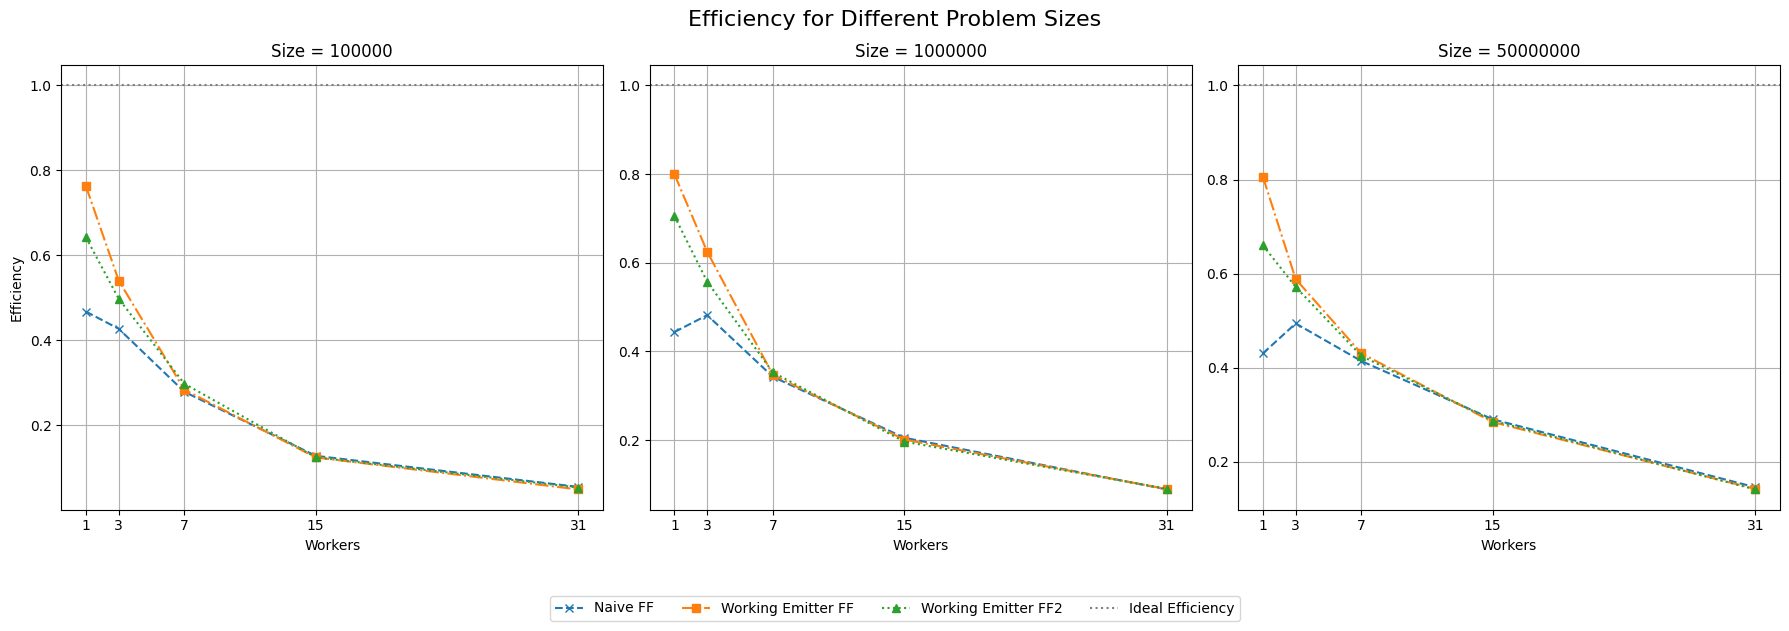

In [11]:
import matplotlib.pyplot as plt

SIZES = [10000, 100000, 1000000, 10000000, 50000000, 100000000]
selected_sizes = [SIZES[1], SIZES[2], SIZES[4]]  # [100000, 1000000, 50000000]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, size in enumerate(selected_sizes):
    # Filter data
    par = par_times[(par_times['size'] == size) & (par_times['payload'] == 1)].copy()
    we = we_times[(we_times['size'] == size) & (we_times['payload'] == 1)].copy()
    we2 = we2_times[(we2_times['size'] == size) & (we2_times['payload'] == 1)].copy()
    seq = seq_times[(seq_times['size'] == size) & (seq_times['payload'] == 1)].copy()

    # Reset indices
    par = par.reset_index(drop=True)
    we = we.reset_index(drop=True)
    we2 = we2.reset_index(drop=True)
    seq = seq.reset_index(drop=True)

    # Keep only best time per number of workers
    par = par.loc[par.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we = we.loc[we.groupby('workers')['time'].idxmin()].reset_index(drop=True)
    we2 = we2.loc[we2.groupby('workers')['time'].idxmin()].reset_index(drop=True)

    seq_time = seq['time'].iloc[0]

    # Compute efficiency
    par['efficiency'] = (seq_time / par['time']) / (par['workers'] + 1)
    we['efficiency'] = (seq_time / we['time']) / (we['workers'] + 1)
    we2['efficiency'] = (seq_time / we2['time']) / (we2['workers'] + 1)

    ax = axs[i]
    ax.plot(par['workers'], par['efficiency'], marker='x', label='Naive FF', linestyle='--')
    ax.plot(we['workers'], we['efficiency'], marker='s', label='Working Emitter FF', linestyle='-.')
    ax.plot(we2['workers'], we2['efficiency'], marker='^', label='Working Emitter FF2', linestyle=':')

    ax.axhline(y=1.0, color='gray', linestyle='dotted', label='Ideal Efficiency' if i == 0 else None)

    ax.set_title(f'Size = {size}')
    ax.set_xlabel('Workers')
    ax.set_xticks(par['workers'])
    ax.grid(True)

axs[0].set_ylabel('Efficiency')

# Single legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Efficiency for Different Problem Sizes', fontsize=16)
plt.savefig('figures/efficiency_subplots.png', dpi=500, bbox_inches='tight')
plt.show()


## Weak scaling

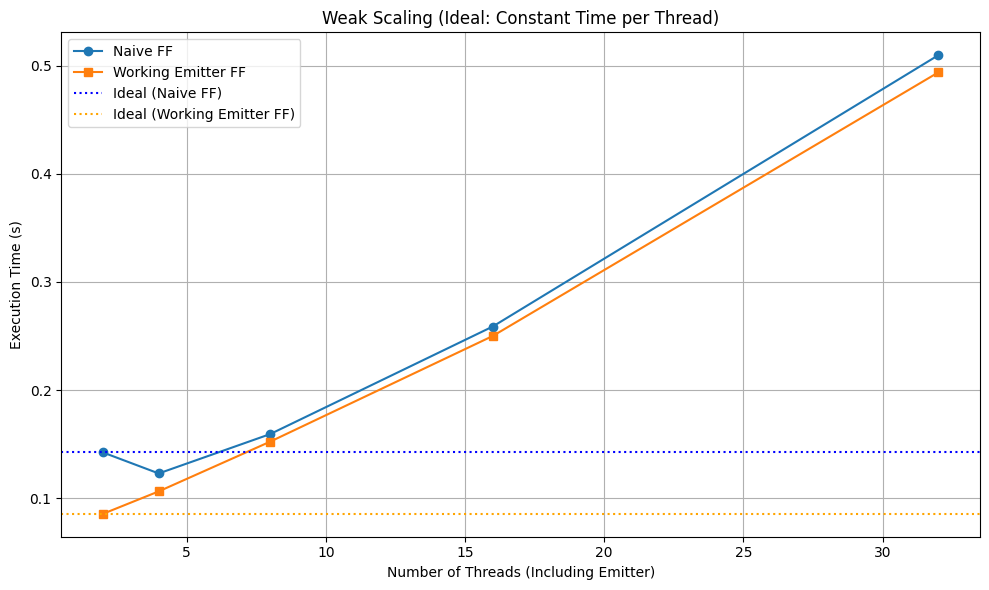

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df1 = pd.read_csv('results/naive_ff_w.csv')
df2 = pd.read_csv('results/working_emitter_ff_w.csv')
seq = pd.read_csv('results/sequential_w.csv')

# Add actual thread count (workers + 1 emitter)
df1['threads'] = df1['workers'] + 1
df2['threads'] = df2['workers'] + 1

# Use baseline time (first row) as ideal constant
ideal_time_1 = df1.iloc[0]['time']
ideal_time_2 = df2.iloc[0]['time']

# Plotting
plt.figure(figsize=(10, 6))

# Actual measurements
plt.plot(df1['threads'], df1['time'], marker='o', label='Naive FF')
plt.plot(df2['threads'], df2['time'], marker='s', label='Working Emitter FF')

# Ideal scaling (flat line)
plt.axhline(y=ideal_time_1, linestyle='dotted', color='blue', label='Ideal (Naive FF)')
plt.axhline(y=ideal_time_2, linestyle='dotted', color='orange', label='Ideal (Working Emitter FF)')

# Labels and legend
plt.xlabel('Number of Threads (Including Emitter)')
plt.ylabel('Execution Time (s)')
plt.title('Weak Scaling (Ideal: Constant Time per Thread)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('figures/weak_scaling.png', dpi=500, bbox_inches='tight')

plt.show()

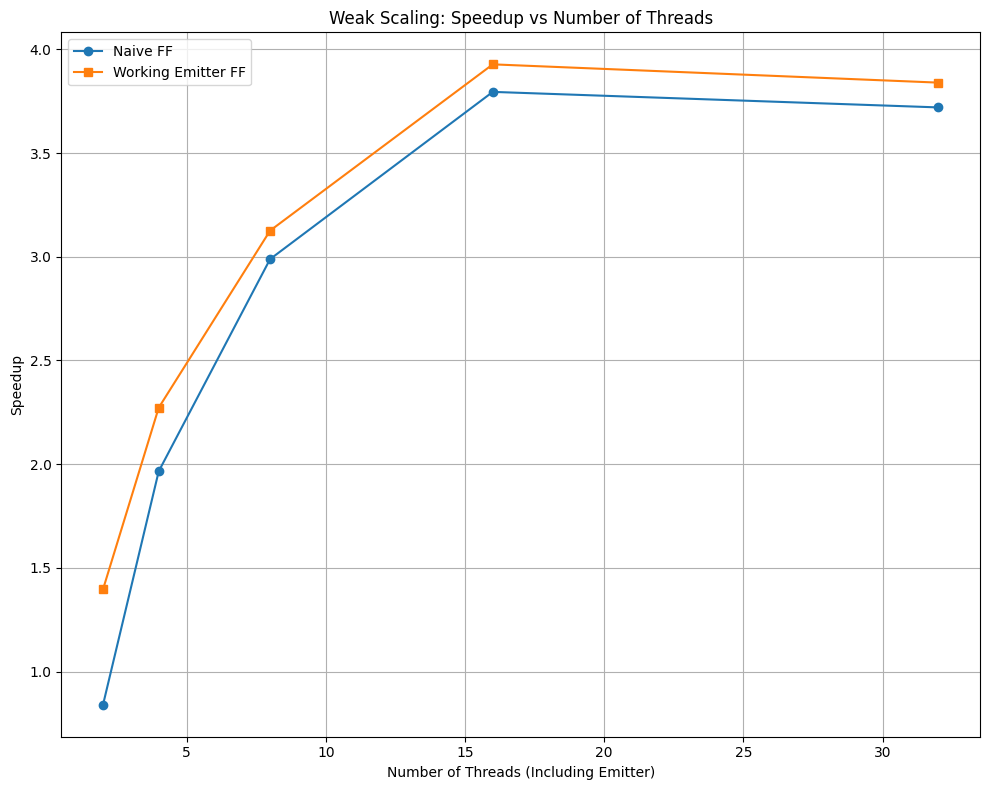

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_naive = pd.read_csv('results/naive_ff_w.csv')
df_emitter = pd.read_csv('results/working_emitter_ff_w.csv')
df_seq = pd.read_csv('results/sequential_w.csv')

# Add total thread count (workers + 1 for emitter)
df_naive['threads'] = df_naive['workers'] + 1
df_emitter['threads'] = df_emitter['workers'] + 1

# Compute speedup using sequential time for matching problem sizes
# Assumes same problem size order in df_seq
df_naive['speedup'] = df_seq['time'].values / df_naive['time']
df_emitter['speedup'] = df_seq['time'].values / df_emitter['time']

# Plotting
plt.figure(figsize=(10, 8))

# Plot speedups
plt.plot(df_naive['threads'], df_naive['speedup'], marker='o', label='Naive FF')
plt.plot(df_emitter['threads'], df_emitter['speedup'], marker='s', label='Working Emitter FF')

# Labels and formatting
plt.xlabel('Number of Threads (Including Emitter)')
plt.ylabel('Speedup')
plt.title('Weak Scaling: Speedup vs Number of Threads')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save to file
plt.savefig('figures/weak_scaling_speedup.png', dpi=300, bbox_inches='tight')
plt.show()


In [14]:
df1.head()

,size,workers,time,threads
0,1000000,1,0.142322,2
1,1900000,3,0.122928,4
2,3650000,7,0.159282,8
3,7000000,15,0.258789,16
4,13400000,31,0.509578,32


In [15]:
plt.figure(figsize=(10, 8))

# Calculate efficiency
df1['efficiency'] = df1['speedup'] / df1['threads']
df2['efficiency'] = df2['speedup'] / df2['threads']

# Plot efficiency
plt.plot(df1['threads'], df1['efficiency'], marker='o', label='Naive FF')
plt.plot(df2['threads'], df2['efficiency'], marker='s', label='Working Emitter FF')

# Labels and legend
plt.xlabel('Number of Threads (Including Emitter)')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('figures/efficiency_weak_scaling.png', dpi=300, bbox_inches='tight')

plt.show()


KeyError: 'speedup'

<Figure size 1000x800 with 0 Axes>

In [ ]:
import numpy as np
from scipy.special import lambertw
n = 1000000
nlogn = n * np.log2(n)
p = 2
c = nlogn / p
print(f"n: {n}, n log n: {nlogn}, p: {p}, c: {c}")

for p in [2, 4, 8, 16, 32]:
	# Compute n using Lambert W function
	n = np.real(lambertw(p*c*np.log(2)))
	n = np.exp(n)
	print(f"Computed n: {n}")

n: 1000000, n log n: 19931568.569324173, p: 2, c: 9965784.284662087
Computed n: 999999.9999999995
Computed n: 1910480.4296067886
Computed n: 3656807.360103112
Computed n: 7011581.950104935
Computed n: 13465692.322948165


# MPI version

Let's compute values for the weak scaling in the mathematical way

In [ ]:
import numpy as np
from scipy.special import lambertw
n = 100000000 # 100.000.000
nlogn = n * np.log2(n)
p = 8
c = nlogn / p
print(f"n: {n}, n log n: {nlogn}, p: {p}, c: {c}")

for p in [1, 2, 4, 8]:
	# Compute n using Lambert W function
	n = np.real(lambertw(p*c*np.log(2)))
	n = np.exp(n)
	print(f"Computed n: {n} for p: {p}")

n: 100000000, n log n: 2657542475.9098897, p: 8, c: 332192809.4887362
Computed n: 13993959.035198892 for p: 1
Computed n: 26917759.447102636 for p: 2
Computed n: 51848806.823173285 for p: 4
Computed n: 99999999.99999982 for p: 8


## Strong scalability

Speedup is visible only if using all 4 nodes, so we will just consider scaling

Multiple tests:
- sequential
- sequential double buffering
- ff 1 per node 7/15 threads
- ff 2 per node 7/15 threads
- ff double buffering 7/15 threads

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_seq = pd.read_csv('results/multinode_seq.csv')
df_ff_1 = pd.read_csv('results/multinode_ff.csv')
df_ff_2 = pd.read_csv('results/multinode_ff_2.csv')
df_ff_db = pd.read_csv('results/multinode_ff_db.csv')

# more sizes were teted, but only this one for all the versions
PROB_SIZES = [50000000, 100000000]

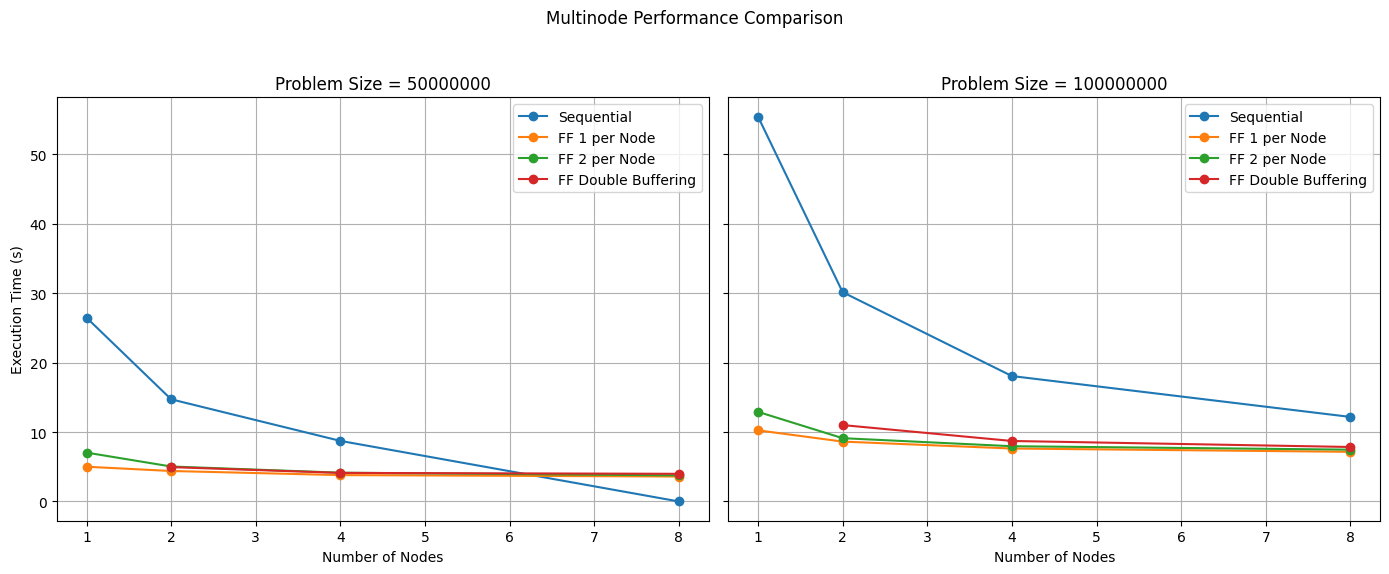

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_seq = pd.read_csv('results/multinode_seq.csv')
df_ff_1 = pd.read_csv('results/multinode_ff.csv')
df_ff_2 = pd.read_csv('results/multinode_ff_2.csv')
df_ff_db = pd.read_csv('results/multinode_ff_db.csv')

# Constants for problem sizes
PROB_SIZES = [50000000, 100000000]

# Helper function to obtain best (minimum) times per number of nodes for a given DataFrame and size
def get_best_times(df, size):
    filtered = df[df['size'] == size]
    best = filtered.groupby('nodes')['time'].min().reset_index()
    return best

# Get best times for each implementation and each size
best_times = {
    'Sequential': {
        size: get_best_times(df_seq, size) for size in PROB_SIZES
    },
    'FF 1 per Node': {
        size: get_best_times(df_ff_1, size) for size in PROB_SIZES
    },
    'FF 2 per Node': {
        size: get_best_times(df_ff_2, size) for size in PROB_SIZES
    },
    'FF Double Buffering': {
        size: get_best_times(df_ff_db, size) for size in PROB_SIZES
    }
}

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, size in enumerate(PROB_SIZES):
    ax = axs[idx]
    for label, data in best_times.items():
        df_best = data[size]
        ax.plot(df_best['nodes'], df_best['time'], marker='o', label=label)
    ax.set_title(f'Problem Size = {size}')
    ax.set_xlabel('Number of Nodes')
    if idx == 0:
        ax.set_ylabel('Execution Time (s)')
    ax.grid(True)
    ax.legend()

plt.suptitle('Multinode Performance Comparison')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
df_ff_1.head()

,nodes,trial,payload,size,buff_size,thread,time
0,2,1,1,50000000,9999999999999,7,5.10521
1,2,1,1,50000000,9999999999999,15,4.39285
2,2,1,1,100000000,9999999999999,7,10.26960
3,2,1,1,100000000,9999999999999,15,8.62815
4,4,1,1,50000000,9999999999999,7,4.17712


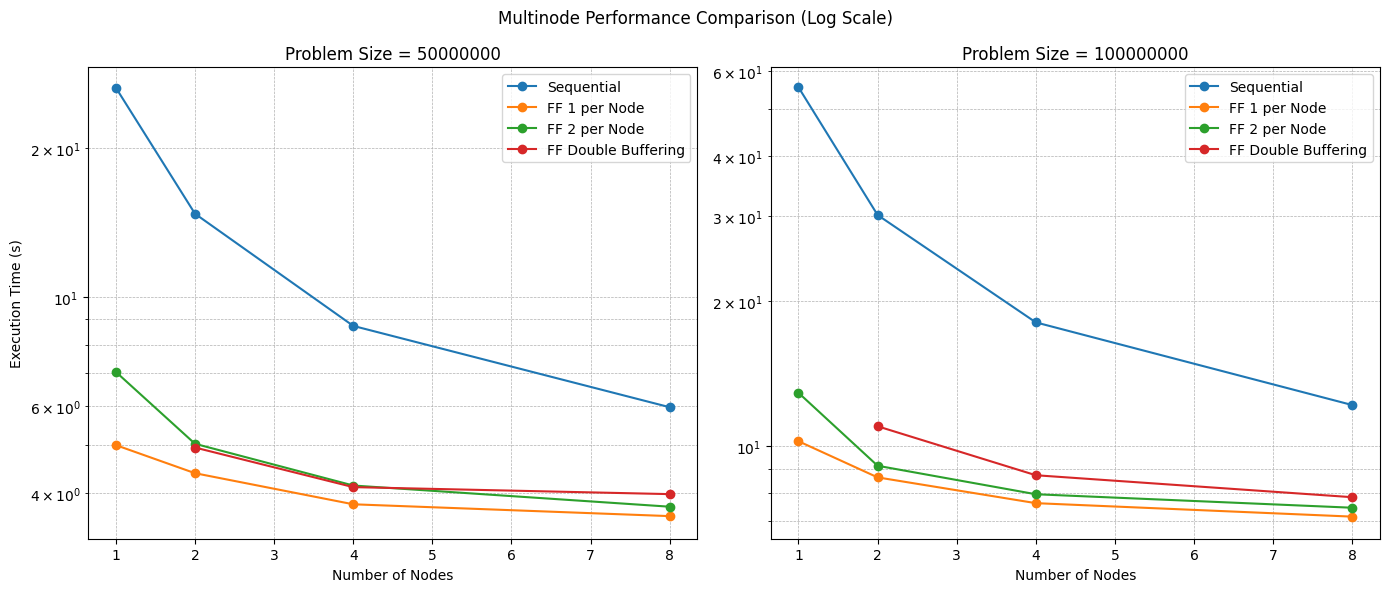

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_seq = pd.read_csv('results/multinode_seq.csv')
df_ff_1 = pd.read_csv('results/multinode_ff.csv')
df_ff_2 = pd.read_csv('results/multinode_ff_2.csv')
df_ff_db = pd.read_csv('results/multinode_ff_db.csv')

PROB_SIZES = [50000000, 100000000]

def get_best_times(df, size):
    filtered = df[df['size'] == size]
    return filtered.groupby('nodes')['time'].min().reset_index()

best_times = {
    'Sequential': {size: get_best_times(df_seq, size) for size in PROB_SIZES},
    'FF 1 per Node': {size: get_best_times(df_ff_1, size) for size in PROB_SIZES},
    'FF 2 per Node': {size: get_best_times(df_ff_2, size) for size in PROB_SIZES},
    'FF Double Buffering': {size: get_best_times(df_ff_db, size) for size in PROB_SIZES},
}

# Compute y-limits per plot
y_lims = []
for size in PROB_SIZES:
    all_times = []
    for label, data in best_times.items():
        all_times.extend(data[size]['time'].tolist())
    min_time = min(all_times)
    max_time = max(all_times)
    y_lims.append((min_time * 0.9, max_time * 1.1))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

for idx, size in enumerate(PROB_SIZES):
    ax = axs[idx]
    for label, data in best_times.items():
        df = data[size]
        ax.plot(df['nodes'], df['time'], marker='o', label=label)
    ax.set_yscale('log')
    ax.set_ylim(y_lims[idx])
    ax.set_title(f'Problem Size = {size}')
    ax.set_xlabel('Number of Nodes')
    if idx == 0:
        ax.set_ylabel('Execution Time (s)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

plt.suptitle('Multinode Performance Comparison (Log Scale)')
plt.tight_layout()
plt.savefig('figures/multinode_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Moving on to strong scaling we will consider only the sequential versionand the 

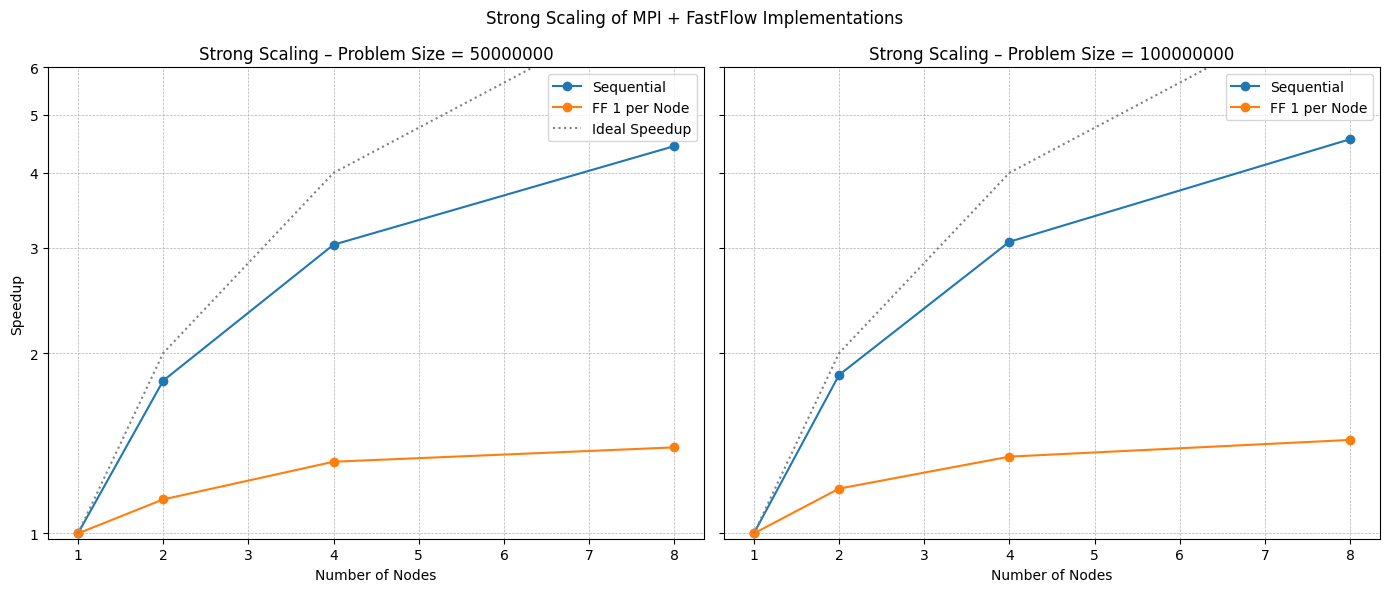

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_seq = pd.read_csv('results/multinode_seq.csv')
df_ff_1 = pd.read_csv('results/multinode_ff.csv')

PROB_SIZES = [50000000, 100000000]

def get_best_times(df, size):
    filtered = df[df['size'] == size]
    return filtered.groupby('nodes')['time'].min().reset_index()

# Collect best times
best_times = {
    'Sequential': {size: get_best_times(df_seq, size) for size in PROB_SIZES},
    'FF 1 per Node': {size: get_best_times(df_ff_1, size) for size in PROB_SIZES},
}

# Compute strong scaling (speedup relative to 1 node)
for label in best_times:
    for size in PROB_SIZES:
        base_time = best_times[label][size]['time'].iloc[0]
        best_times[label][size]['StrongScaling'] = base_time / best_times[label][size]['time']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, size in enumerate(PROB_SIZES):
    ax = axs[idx]
    for label, data in best_times.items():
        df = data[size]
        ax.plot(df['nodes'], df['StrongScaling'], marker='o', label=label)
    # Ideal speedup line
    nodes = best_times['Sequential'][size]['nodes']
    ax.plot(nodes, nodes, linestyle='dotted', color='gray', label='Ideal Speedup' if idx == 0 else "")
    ax.set_title(f'Strong Scaling – Problem Size = {size}')
    ax.set_xlabel('Number of Nodes')
    ax.set_yscale('log')
    ax.set_ylim(0.98, 6)
    ax.set_yticks([1, 2, 3, 4, 5, 6])
    ax.set_yticklabels(['1', '2', '3', '4', '5', '6'])
    
    if idx == 0:
        ax.set_ylabel('Speedup')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()

plt.suptitle('Strong Scaling of MPI + FastFlow Implementations')
plt.tight_layout()
plt.savefig('figures/strong_scaling_mpi.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
best_times['Sequential']

{50000000:    nodes      time  StrScaling
 0      1  26.48330    1.000000
 1      2  14.72180    1.798917
 2      4   8.72835    3.034170
 3      8   5.97469    4.432581,
 100000000:    nodes     time  StrScaling
 0      1  55.4573    1.000000
 1      2  30.1584    1.838867
 2      4  18.0717    3.068737
 3      8  12.1824    4.552248}

## Weak scalability

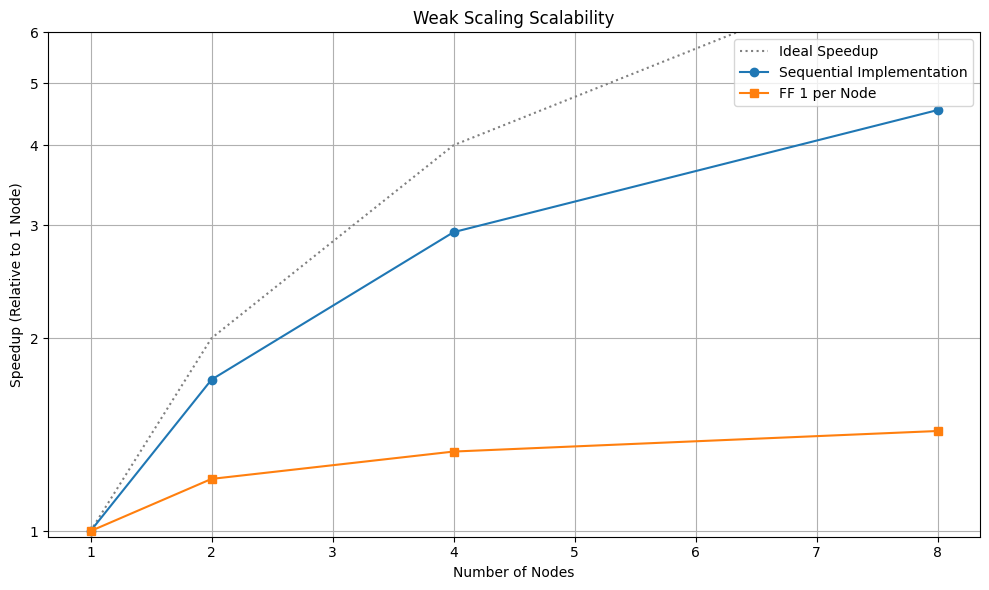

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_seq = pd.read_csv('results/multinode_seq_weak.csv')
df_seq_ref = pd.read_csv('results/multinode_seq_weak_ref.csv')
df_ff_1 = pd.read_csv('results/multinode_ff_weak.csv')
df_ff_1_ref = pd.read_csv('results/multinode_ff_weak_ref.csv')

# Compute weak scaling speedup
df_seq['speedup'] = df_seq_ref['time'] / df_seq['time']
df_ff_1['speedup'] = df_ff_1_ref['time'] / df_ff_1['time']

# Plot
plt.figure(figsize=(10, 6))
nodes = df_seq['nodes']

# Ideal scaling
plt.plot(nodes, nodes, linestyle='dotted', color='gray', label='Ideal Speedup')

# Actual
plt.plot(df_seq['nodes'], df_seq['speedup'], marker='o', label='Sequential Implementation')
plt.plot(df_ff_1['nodes'], df_ff_1['speedup'], marker='s', label='FF 1 per Node')

# Labels and legend
plt.yscale('log')
plt.ylim(0.98, 6)
plt.yticks([1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6'])
plt.title('Weak Scaling Scalability')
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup (Relative to 1 Node)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('figures/weak_scaling_mpi.png', dpi=300, bbox_inches='tight')
plt.show()


The amount of serial work increase, so it's okay if it's not a line